# AS HW3

김보람  
2023-05-10

In [20]:
library(ggplot2)

# 1번

중학교 2학년 학생 중에서 15명을 임의로 추출하여 각 학생의 약력(kg),
신장(cm), 체중(kg)과 원반던지기에서 던진 거리(m)를 측정하여 다음의
데이터를 얻었다. 다음 물음에 답하여라. (R을 이용하여 풀이)(검정에서는
유의수준 α = 0.05 사용)

| 학생번호 | x1(약력) | x2(신장) | x3(체중) | y(원반던지기 거리) |
|----------|----------|----------|----------|--------------------|
| 1        | 28       | 146      | 34       | 22                 |
| 2        | 47       | 169      | 57       | 36                 |
| 3        | 39       | 160      | 38       | 24                 |
| 4        | 25       | 156      | 28       | 22                 |
| 5        | 34       | 161      | 37       | 27                 |
| 6        | 29       | 168      | 50       | 29                 |
| 7        | 38       | 154      | 54       | 26                 |
| 8        | 23       | 153      | 40       | 23                 |
| 9        | 52       | 160      | 62       | 31                 |
| 10       | 37       | 152      | 39       | 25                 |
| 11       | 35       | 155      | 46       | 23                 |
| 12       | 39       | 154      | 54       | 27                 |
| 13       | 38       | 157      | 57       | 31                 |
| 14       | 32       | 162      | 53       | 25                 |
| 15       | 25       | 142      | 32       | 23                 |

In [29]:
dt <- data.frame(x1 = c(28,47,39,25,34,29,38,23,52,37,35,39,38,32,25),
                 x2 = c(146,169,160,156,161,168,154,153,160,152,155,154,157,162,142),
                 x3 = c(34,57,38,28,37,50,54,40,62,39,46,54,57,53,32),
 y = c(22,36,24,22,27,29,26,23,31,25,23,27,31,25,23))

## (1)

$x_3$를 설명변수로 하고 $y$를 반응변수로 하여 회귀직선을 적합시키고,
이상치가 있는가, 어떤 것이 영향을 크게 주는 측정값인가를 판정하시오.

In [18]:
model1 <- lm(y~x3,dt)
summary(model1)

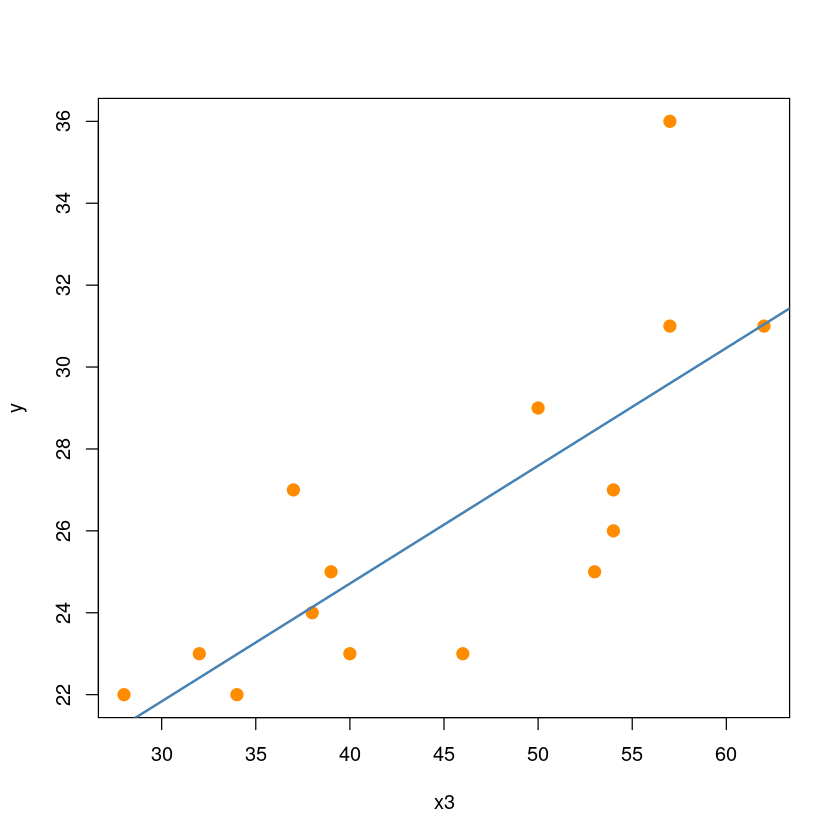

In [26]:
plot(y~x3, dt,pch = 20,cex = 2,col = "darkorange")
abline(model1, col='steelblue', lwd=2)

### leverage

-   Hmatrix

In [72]:
X = cbind(rep(1, nrow(dt)), dt$x3)
H = X %*% solve(t(X) %*% X) %*% t(X)
diag(H)

-   hatvalues 함수

In [127]:
which.max(hatvalues(model1))
hatvalues(model1)[which.max(hatvalues(model1))]

In [124]:
2*(1+1)/nrow(dt)

-   $h_{4} < 2\bar h$이므로 leverage포인트로 고려할 점은 없다.

### 이상치

-   잔차

In [75]:
residual <- model1$residuals
head(residual)

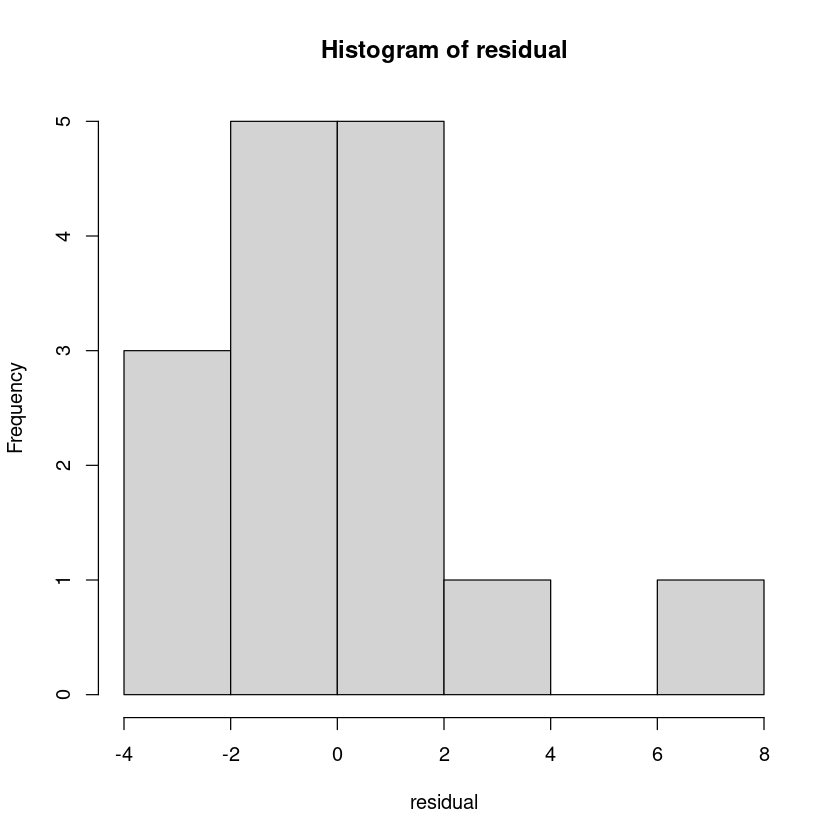

In [76]:
hist(residual)

-   내적표준화된 잔차

In [77]:
s_residual <- rstandard(model1)
head(s_residual)

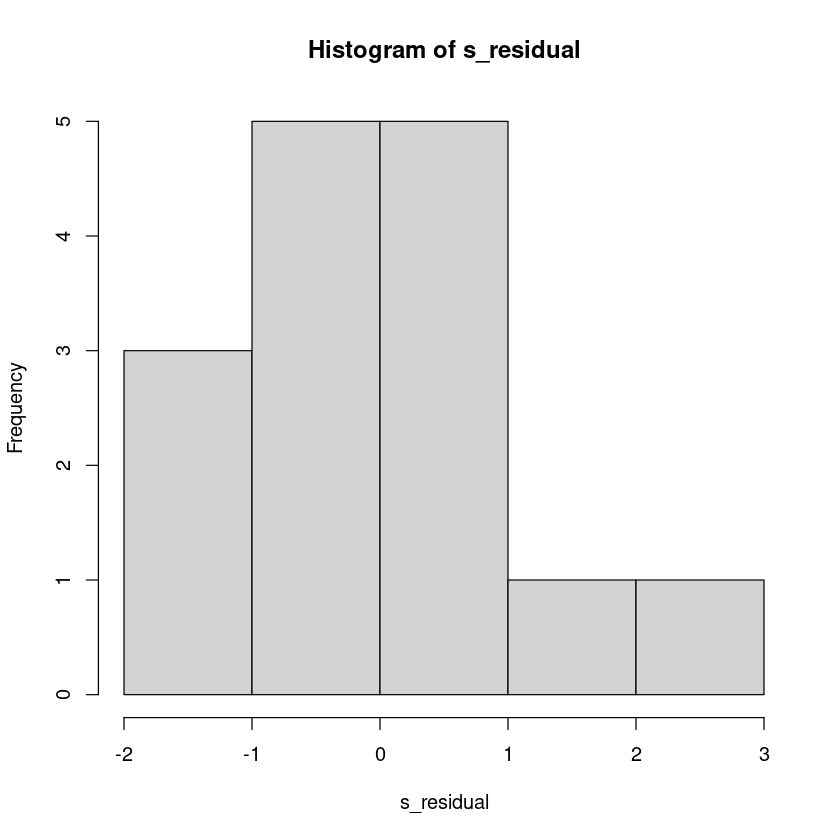

In [168]:
hist(s_residual)

In [132]:
s_residual>2

-   외적표준화된 잔차

In [78]:
s_residual_i <- rstudent(model1)
head(s_residual_i)

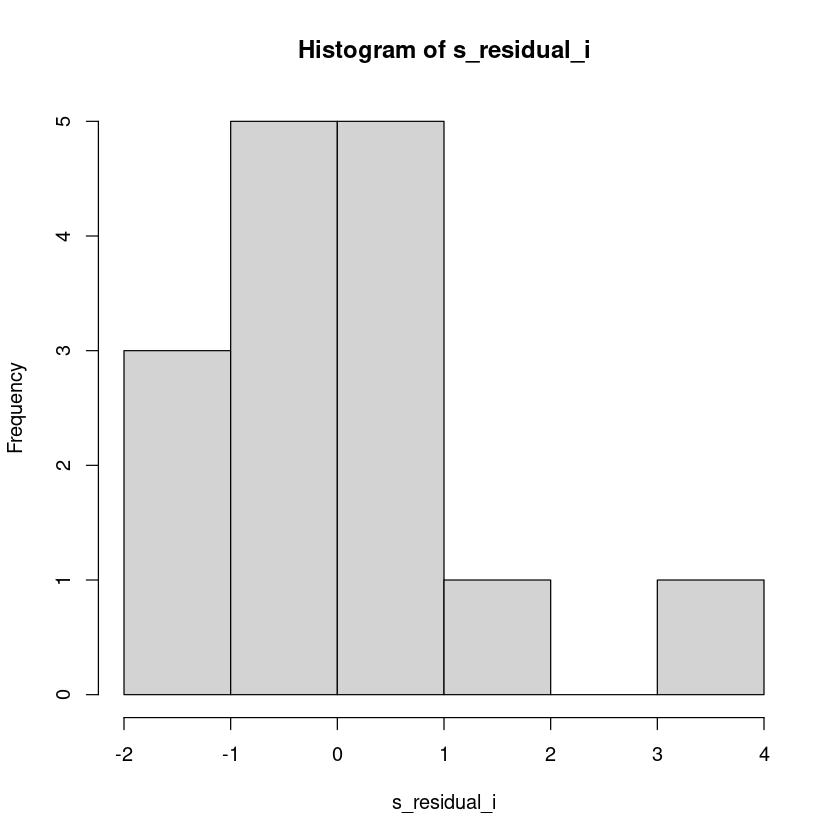

In [79]:
hist(s_residual_i)

In [169]:
which.max(s_residual_i)
s_residual_i[which.max(s_residual_i)]

In [170]:
qt(0.975, 15-1-2)

-   $|r_i^*| \geq t_{\alpha/2}(12)$ 이므로 2번째 관측값은 유의수준
    0.05에서 이상점이다.

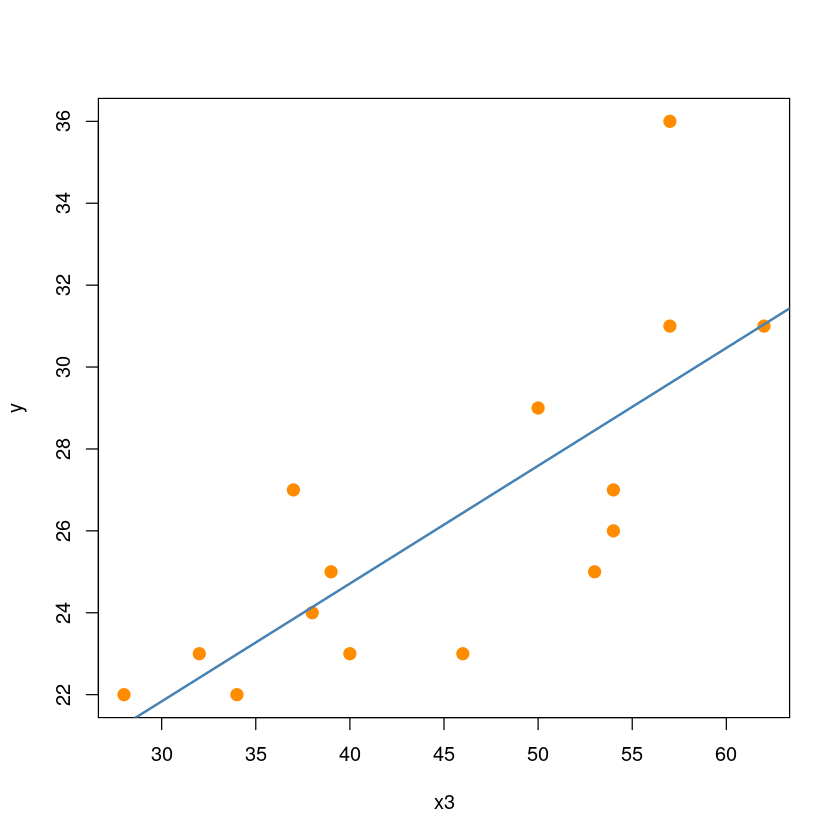

In [141]:
plot(y~x3, dt,pch = 20,cex = 2,col = "darkorange")
abline(model1, col='steelblue', lwd=2)

### 영향점

In [142]:
influence(model1)

In [88]:
influence.measures(model1)

-   DFFITS

In [89]:
dffits(model1) 

In [90]:
which(abs(dffits(model1)) > 2*sqrt(2/(15-2)))

-   Cook’s Distance

In [162]:
cooks.distance(model1)

In [163]:
qf(0.5,2,15-2)

In [164]:
which(cooks.distance(model1) >qf(0.5,2,15-2))

없다

-   COVRATIO

In [165]:
covratio(model1)

In [166]:
which(abs(covratio(model1)-1) > 3*(1+1)/15)

In [167]:
summary(influence.measures(model1))

Potentially influential observations of
     lm(formula = y ~ x3, data = dt) :

  dfb.1_ dfb.x3  dffit   cov.r   cook.d hat  
2 -0.88   1.12_*  1.50_*  0.33_*  0.60   0.15
4  0.17  -0.16    0.18    1.56_*  0.02   0.26
9  0.01  -0.01   -0.01    1.55_*  0.00   0.24

-   영향점은 2번째 관측값이다.

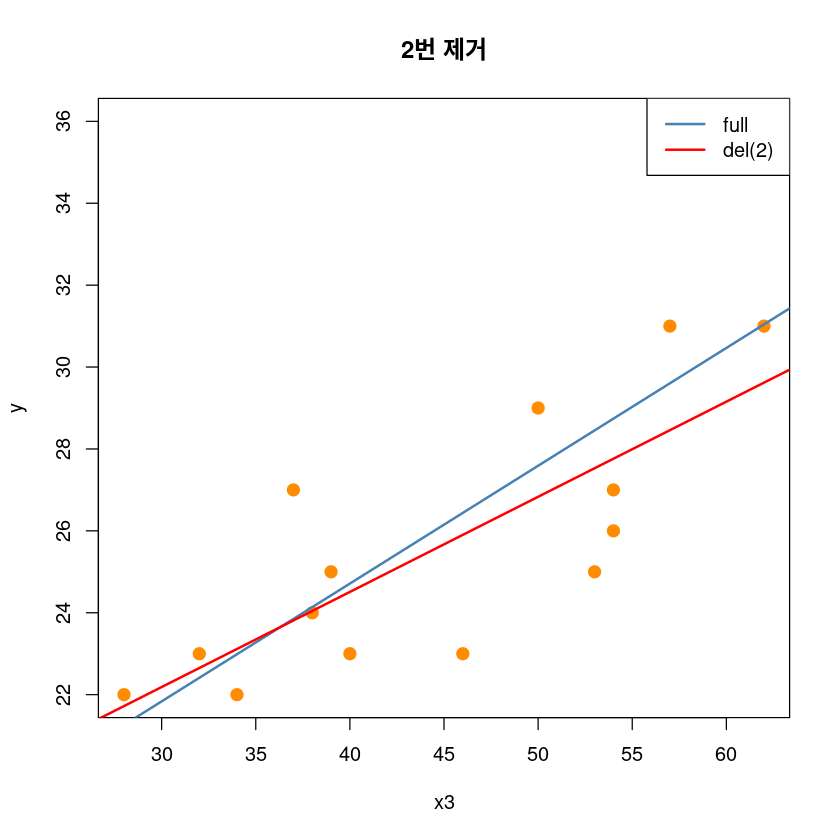

In [93]:
## 2제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "2번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-2,]), col='red', lwd=2)
text(dt[2,], pos=2, "2")
legend('topright', legend=c("full", "del(2)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

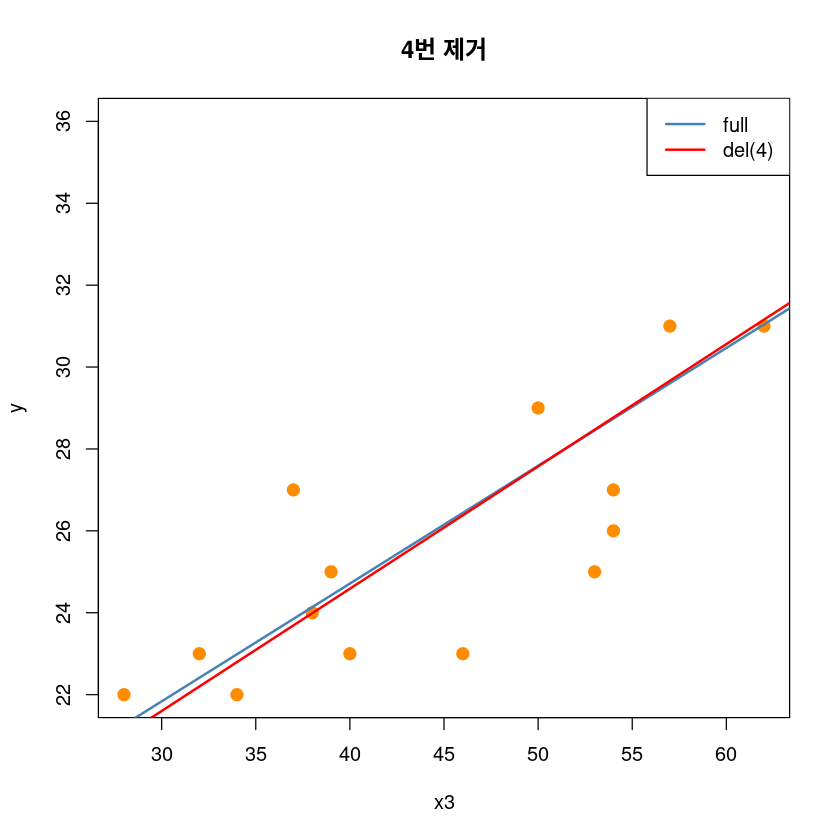

In [171]:
## 4제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "4번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-4,]), col='red', lwd=2)
text(dt[-4,], pos=2, "2")
legend('topright', legend=c("full", "del(4)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

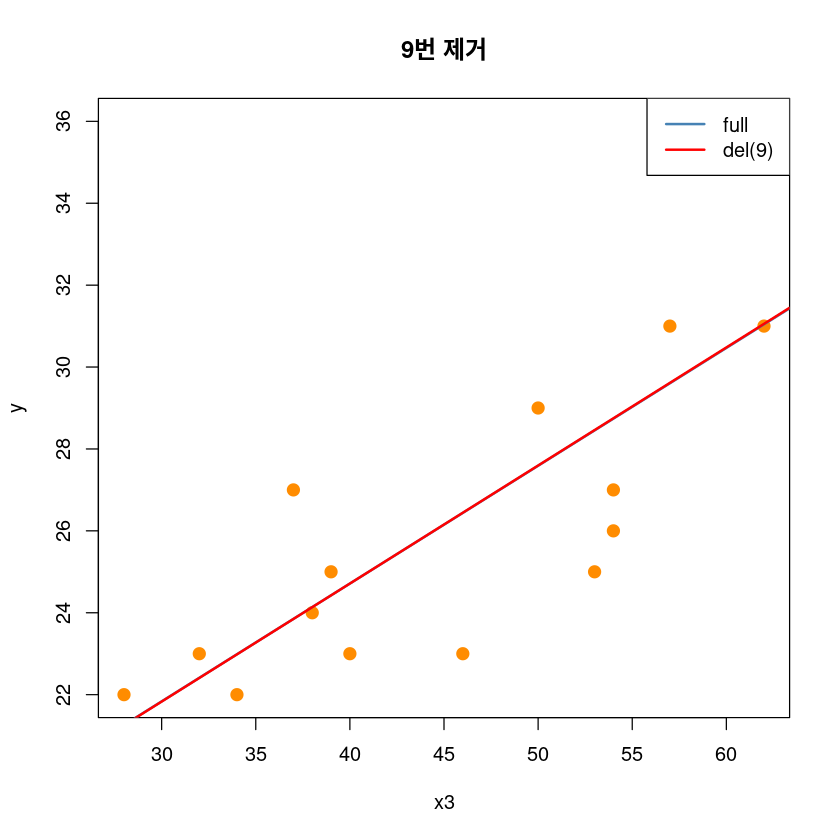

In [173]:
## 9제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "9번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-9,]), col='red', lwd=2)
legend('topright', legend=c("full", "del(9)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

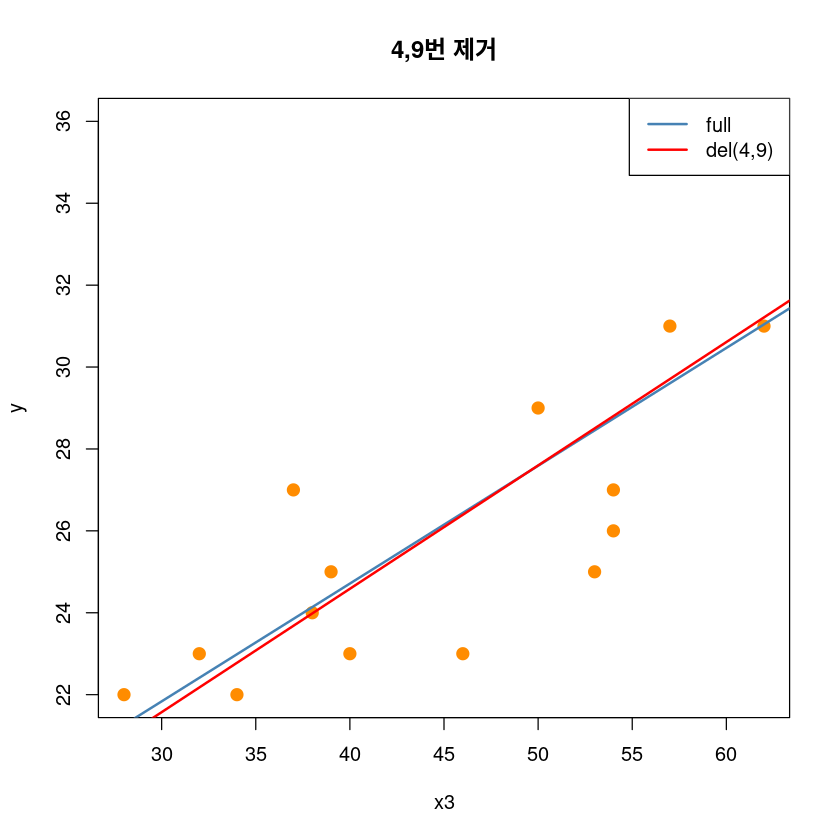

In [174]:
## 4,9제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "4,9번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-c(4,9),]), col='red', lwd=2)
legend('topright', legend=c("full", "del(4,9)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

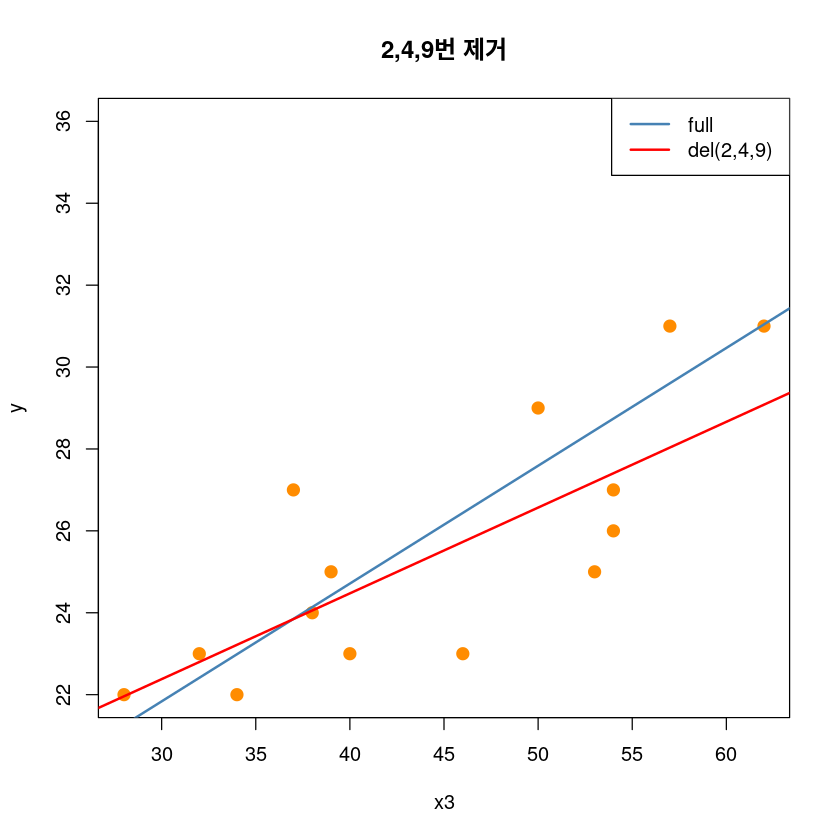

In [175]:
## 2,4,9제거 전후
plot(y~x3, dt,pch = 20,
 cex = 2,col = "darkorange",
 main = "2,4,9번 제거")
abline(model1, col='steelblue', lwd=2)
abline(lm(y~x3, dt[-c(2,4,9),]), col='red', lwd=2)
legend('topright', legend=c("full", "del(2,4,9)"),
 col=c('steelblue', 'red'), lty=1, lwd=2)
# high leverage and high influence, not outlier

### 정규성

In [64]:
shapiro.test(model1$residuals)

### 회귀진단 그림

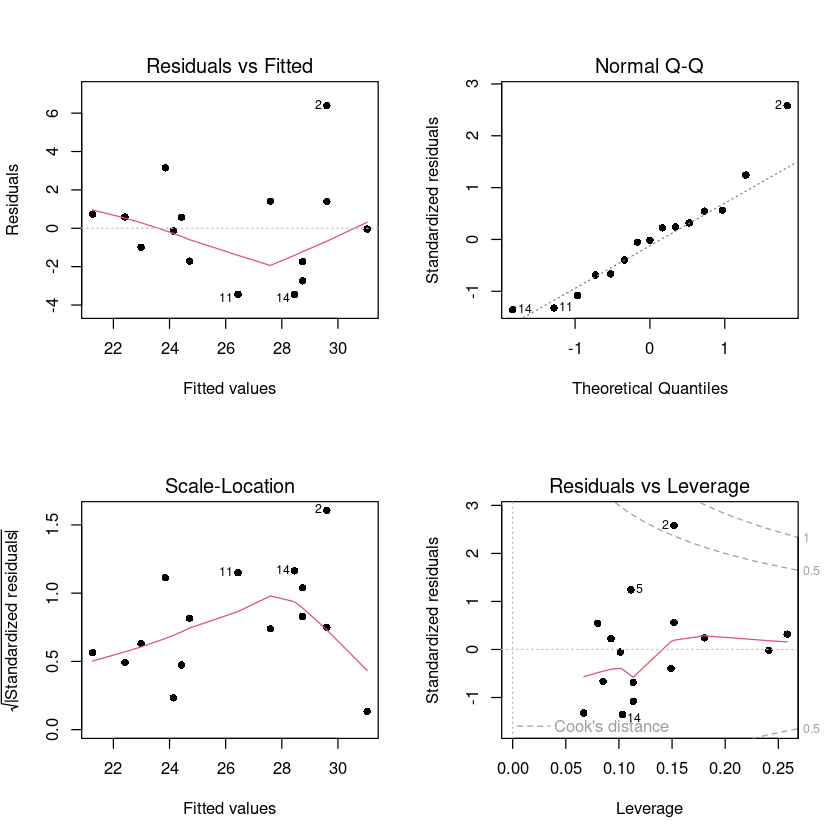

In [159]:

par(mfrow = c(2, 2))
plot(model1, pch=16)

## (2)

$x_1, x_2, x_3$ 를 모두 사용하여 $y$에 대한 중회귀모형을 적합시키고,
이상치의 존재유무와 영향을 크게 주는 측정값이 어떤 것인가를 판정하시오.

In [143]:
model2 <- lm(y~x1+x2+x3,dt)
summary(model2)

### leverage

In [145]:
which.max(hatvalues(model2))
hatvalues(model2)[which.max(hatvalues(model2))]

In [146]:
2*(3+1)/nrow(dt)

-   leverage 고려할 포인트는 업사.

### 이상치

-   잔차

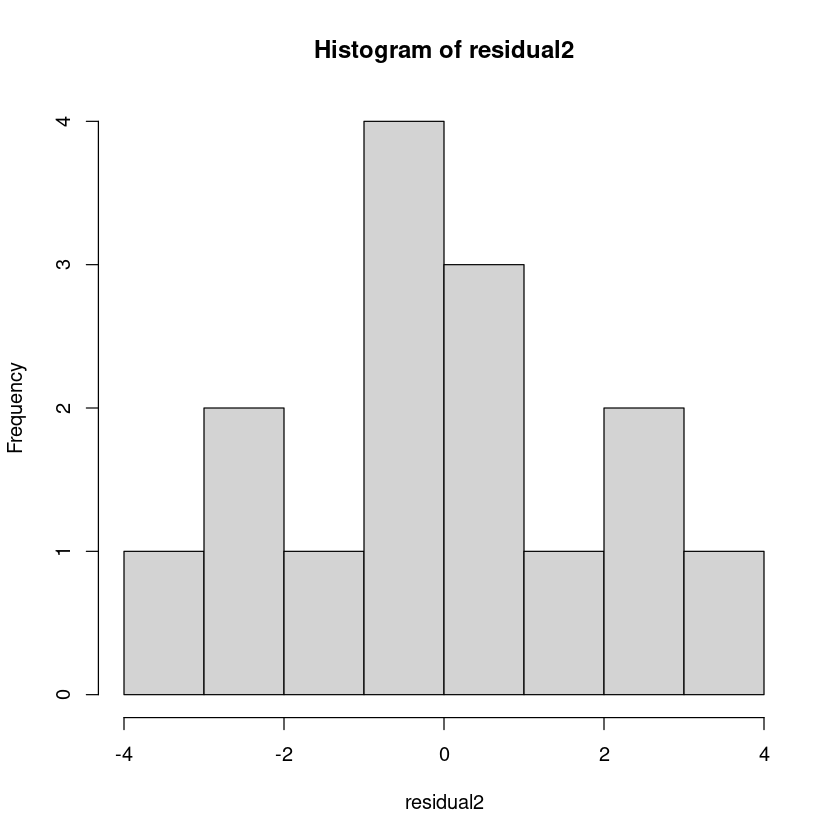

In [148]:
residual2 <- model2$residuals
head(residual2)
hist(residual2)

-   내적표준화된 잔차

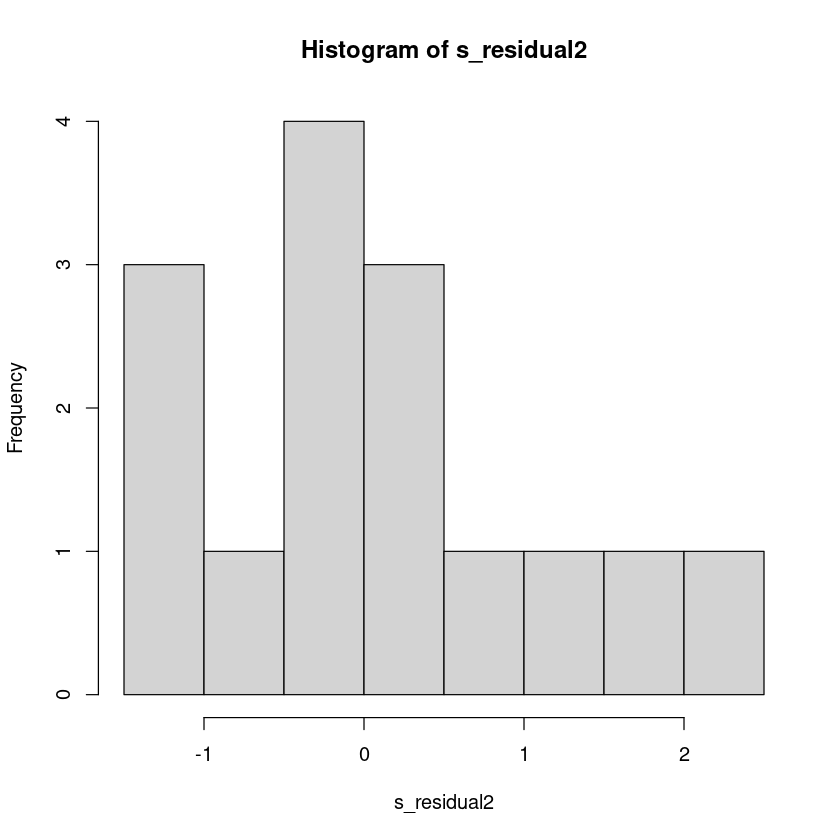

In [176]:
s_residual2 <- rstandard(model2)
head(s_residual2)
s_residual>2
hist(s_residual2)

-   외적표준화된 잔차

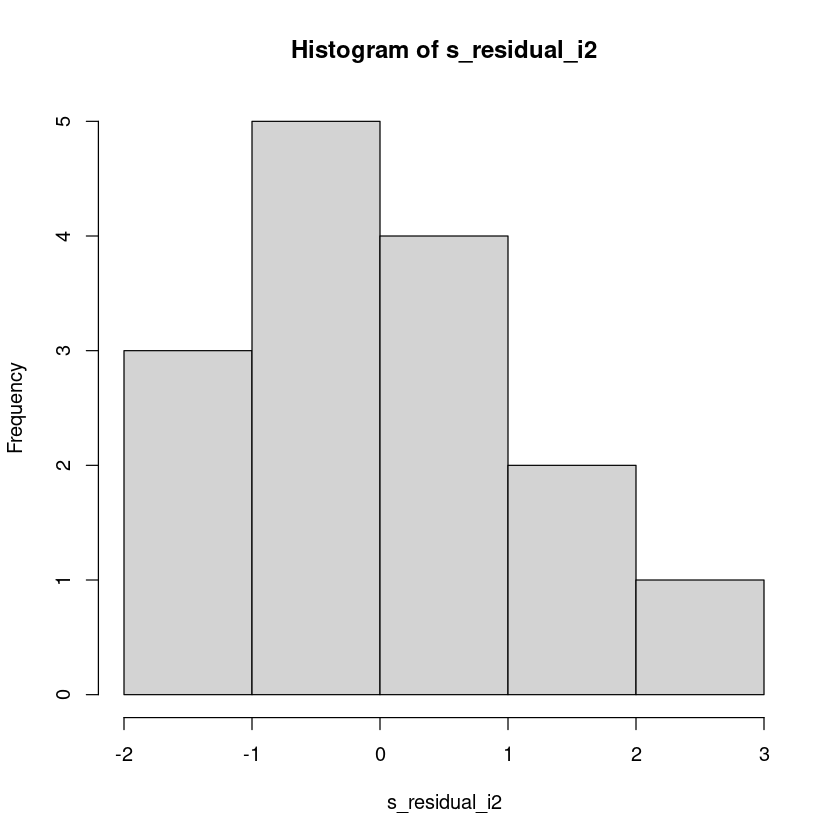

In [150]:
s_residual_i2 <- rstudent(model2)
head(s_residual_i2)
hist(s_residual_i2)

In [151]:
which.max(s_residual_i2)
s_residual_i[which.max(s_residual_i2)]

In [152]:
qt(0.975, 15-3-2)

-   $|r_i^*| \geq t_{\alpha/2}(10)$ 이므로 2번째 관측값은 유의수준
    0.05에서 이상점이다.

### 영향점

In [99]:
influence(model2)

In [100]:
influence.measures(model2)

-   DFFITS

In [101]:
dffits(model2) 

In [102]:
which(abs(dffits(model2)) > 2*sqrt(2/(15-3-1)))

-   Cook’s distance

In [103]:
cooks.distance(model2)

In [155]:
qf(0.5,3+1,15-3-1)

In [156]:
which(cooks.distance(model2) >qf(0.5,4,11))

없다

-   covratio

In [119]:
covratio(model2)

In [108]:
which(abs(covratio(model2)-1) > 3*(3+1)/15)

### 정규성

In [67]:
shapiro.test(model2$residuals)

### 회귀진단 그림

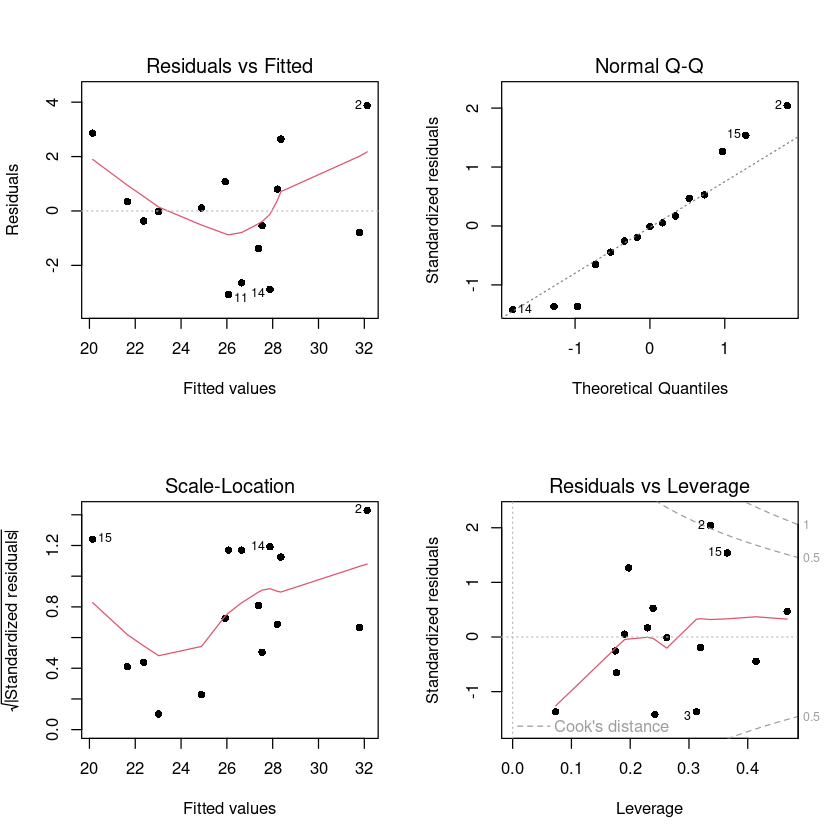

In [177]:
par(mfrow = c(2, 2))
plot(model2, pch=16)

# 2번

어떤 화학공장에서 $NH_3$를 $HNO_3$로 산화시키는 공정을 가지고 있다. 이
산화공정에 미치는 중요한 요인으로 생각되어지는 변수는

$x_1$ = 작업속도

$x_2$ = 냉각수의 온도

$x_3$ = 흡수액 속의 $HNO_3$의 농도

이다. $y$는 $NH_3$를 $HNO_3$로 바꿀 때 손실되는 $NH_3$의 %로 잡아주었다.
21일간의 공정기간 중에 얻은 자료는 앞의 것과 같다.

| 실험번호 | $x_1$ | $x_2$ | $x_3$ | $y$ |
|----------|-------|-------|-------|-----|
| 1        | 80    | 27    | 89    | 42  |
| 2        | 80    | 27    | 88    | 37  |
| 3        | 75    | 25    | 90    | 37  |
| 4        | 62    | 24    | 87    | 28  |
| 5        | 62    | 22    | 87    | 18  |
| 6        | 62    | 23    | 87    | 18  |
| 7        | 62    | 24    | 93    | 19  |
| 8        | 62    | 24    | 93    | 20  |
| 9        | 58    | 23    | 87    | 15  |
| 10       | 58    | 18    | 90    | 14  |
| 11       | 58    | 18    | 89    | 14  |
| 12       | 58    | 17    | 88    | 13  |
| 13       | 58    | 18    | 82    | 11  |
| 14       | 58    | 19    | 93    | 12  |
| 15       | 50    | 18    | 89    | 8   |
| 16       | 50    | 18    | 86    | 7   |
| 17       | 50    | 19    | 72    | 8   |
| 18       | 50    | 19    | 79    | 8   |
| 19       | 50    | 20    | 80    | 9   |
| 20       | 56    | 20    | 82    | 15  |
| 21       | 70    | 20    | 91    | 15  |

In [290]:
dt2 <- data.frame(x1 = c(80,80,75,62,62,62,62,62,58,58,58,58,58,58,50,50,50,50,50,56,70),
                 x2 = c(27,27,25,24,22,23,24,24,23,18,18,17,18,19,18,18,19,19,20,20,20),
                 x3 = c(89,88,90,87,87,87,93,93,87,90,89,88,82,93,89,86,72,79,80,82,91),
 y = c(42,37,37,28,18,18,19,20,15,14,14,13,11,12,8,7,8,8,9,15,15))



## (1)

중회귀모형

$y_i = β_0 + β_1x_{i1} + β_2x_{i2} + β_3x_{i3} + ϵ_i$

$i = 1, 2, · · · , 21$

\$ϵ_i $∼$N(0, σ^2_ϵ)\$

이 데이터간의 관계를 설명하는 데 충분하다고 가정하고 다음의 물음에
답하시오. 유의수준 α = 0.05를 사용하여라.

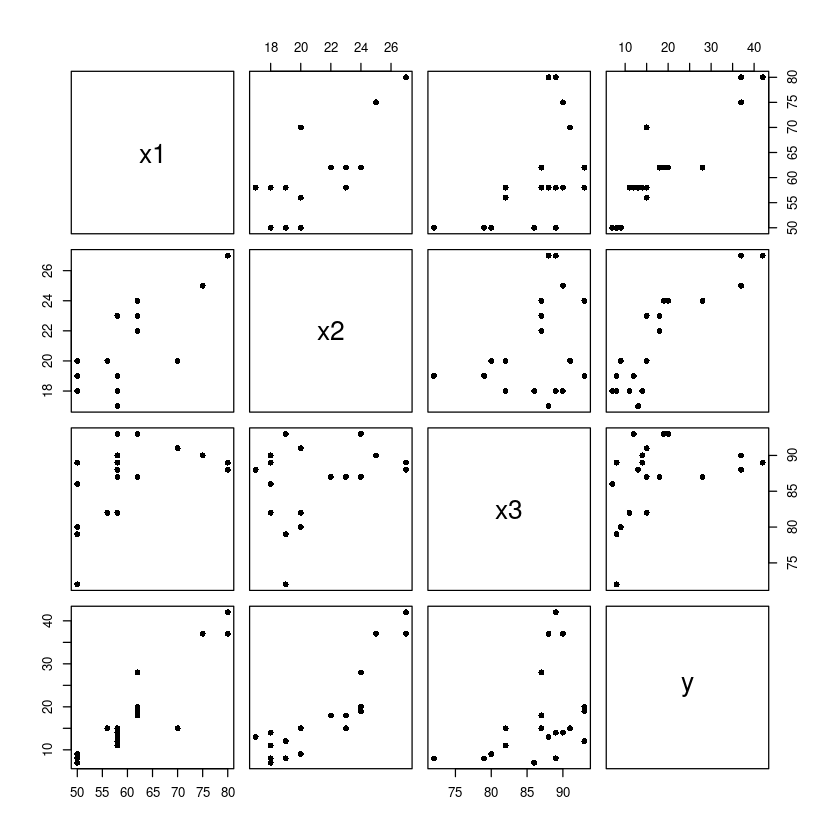

In [291]:
pairs(dt2, pch=16)
cor(dt2)

-   y와 x1의 상관관계가 높아보인다. y와 x2도 높아보이낟.

-   x1과 x2도 높다!!

In [292]:
m <- lm(y~., dt2) ##FM
summary(m)

### (a)

add1/drop1 함수를 이용하여, 부분F검정통계량 값을 통한 후진제거법을
시행하여 가장 적절한 회귀모형을 구하여라.

In [293]:
drop1(m,test="F")

In [294]:
qf(0.95,1,21-3-1)

$F_L < F_{\alpha B}$ 이므로 설명변수 x3제거

In [295]:
m1 <- update(m, ~ . -x3)
summary(m1)

-   pvalue의 값도 유의하고 $R^2$도 약 90%의 설명력을 가진다. 각각의
    회귀계수도 유의하다.

-   $y=-50.3588 + 0.6712 x_1 + 1.2954 x_2$

In [296]:
drop1(m1, test = "F")

In [297]:
qf(0.95,1,21-2-1)

-   F-value값이 작은 x2를 제거하려고 봤더니 pr값이 0.002419로 유의하므로
    제거하지 않는다.

### (b)

add1/drop1 함수를 이용하여, 부분F검정통계량 값을 통한 전진선택법을
시행하여 가장 적절한 회귀모형을 구하여라.

In [298]:
m0 = lm(y ~ 1, data = dt2)
add1(m0, scope = y ~ x1 + x2 + x3, test = "F")

-   F값이 큰 x1을 추가하자. 심지어 유의하당

In [299]:
qf(0.95,1,21-1-1)

In [300]:
m1 <- update(m0, ~.+x1)
summary(m1)

In [301]:
add1(m1,
 scope = y ~ x1 + x2 + x3,
 test = "F")

-   x2의 Fvalue가 크고 유의하므로 추가하자.

In [302]:
m2 <- update(m1, ~ . +x2)
summary(m2)

In [303]:
add1(m2,
 scope = y ~ x1 + x2 + x3,
 test = "F") 

-   x3의 pr값도 유의수준 0.05에서 유의하지 않다. 모형에 포함될 수
    없으므로 멈춘다. 최종모형은 x1과 x2를 포함한 모형이다.

### (c)

add1/drop1 함수를 이용하여, 부분F검정통계량 값을 통한 단계적
전진선택법을 시행하여 가장 적절한 회귀모형을 구하여라.

In [304]:
m0 = lm(y ~ 1, data = dt2)

In [305]:
add1(m0,
 scope = y ~ x1 + x2 + x3,
 test = "F") 

-   Fvalue가 크고 pr값이 유의하 x1을 추가하자.

In [306]:
m1 <- update(m0, ~ . +x1)
summary(m1)

In [307]:
add1(m1,
 scope = y ~ x1 + x2 + x3,
 test = "F") 

-   x2의 Fvalue가 더 크고 pr값이 유의하므로 x2선택

In [308]:
m2 <- update(m1, ~ . +x2)

-   x1이 있는 모형에 x2를 추가함

In [309]:
drop1(m2, test = "F")

-   x1을 보자. 제거할까? 유의하므로 제거하지 말자.

In [310]:
add1(m2,
 scope = y ~ x1 + x2 + x3,
 test = "F")

-   유의수준 0.05에서는 유의하지 않으므로 x3를 추가하지 않는다.

In [311]:
summary(m2)

## (2)

leaps 패키지의 regsubsets 함수를 이용하여, 다음의 물음에 답하여라.

In [312]:
library(leaps)

### (a)

전역탐색법을 사용하여, 가능한 모든 회귀모형에 대하여
$MSE_p, R^2_p, R^2_{adj,p}, C_p$ 를 구하여라. (regsubsets 사용시,
옵션에서 nbest=1 대신에 적당한 숫자를 입력하면 모든 회귀모형에 대한
결과를 확인할 수 있다.)

In [313]:
fit<-regsubsets(y~., data=dt2, nbest=6,
method='exhaustive',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

### (b)

$p = 1, p = 2, p = 3$에서 각각 가장 적절한 회귀모형을 구하여라. (기준 :
$R^2_p$)

p=1인 경우에 $R_2$ 값이 가장 큰(0.846) 모형을 선택한다. 즉
$y=\beta_0+\beta_1x_1$

p=2인 경우에는 $y=\beta_0+\beta_1x_1+\beta_2x_2$

p=3인 경우에는 $y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3$

In [314]:
fit<-regsubsets(y~., data=dt2, nbest=1,
method='exhaustive',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

### (c)

위에서 구한 모형 중 가장 적절한 회귀모형을 선택하여라.

adjr이 제일 높은 모형-\> y=x1+x2

rss는 작은것이 제일 좋은데 3개를 선택한 모형은 원래 제일 작음.. x1 1개만
선택한 모형의 rss는 319이고 x1과 x2를 선택한 모형의 rss는 188로 급격히
감소함. x3까ㅣ 추가한것은 183으로 별차이가 없으므로 x1+x2를 선택한
모형을 고르는 것이 좋아보인다. bic값도 제일 낮음

### (d)

$C_p$의 경우 $C_p ≤ p + 1$ 이면 좋은 모형으로 판정하고, 이를 만족할 때
변수의 수가 가장 적은 모형을 선택하는 것이 좋다고 알려져 있다. $C_p$ 를
이용했을 때, $p = 1, p = 2, p = 3$에서 각각 가장 좋은 모형을 선택하여라.

p=1일때는 x1선택한 모형이 제일작지만, cp\>2이므로 좋은 모형이 아니다.

p=2일때는 x1+x2

p=3일때는 x1+x2+x3

In [315]:
fit<-regsubsets(y~., data=dt2, nbest=6,
method='exhaustive',
)
summary(fit)
with(summary(fit),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

### (e)

위에서 선택한 모형 중 $C_p$를 기준으로 가장 적절한 회귀모형을 선택하여라

p=2일때 x1+x2를 선택한 모형이 가장 적절하다. p=1인 경우에는
cp\<p+1이므로 좋은 모형이라고 할 수 없다.

## (3)

일차 선형항(lenear terms)만으로는 충분하지 않다고 생각하고
이차다항회귀모형

$y = β_0 + β_1x_1 + β_2x_2 + β_3x_3 + β_4x^2_1 + β_5x^2_2 + β_6x^2_3 + β_7x_1x_2 + β_8x_1x_3 + β_9x_2x_3 + ϵ$을
가정하였다. 다음 물음에 답하여라.

In [316]:
dt2$x_1 <- dt2$x1^2
dt2$x_2 <- dt2$x2^2
dt2$x_3 <- dt2$x3^2
dt2$x1x2 <- dt2$x1 * dt2$x2
dt2$x1x3 <- dt2$x1 * dt2$x1
dt2$x2x3 <- dt2$x2 * dt2$x3
head(dt2)

### (a)

변수간 상관계수를 구하여라.

In [317]:
cor(dt2)

### (b)

설명변수 9개를 모두 사용한 완전모형(full model)에 대한 분산분석표를
작성하고, α = 0.05에서 선형회귀모형의 유의성을 검정하시오.

In [318]:
model3 <- lm(y~.,data=dt2)
summary(model3)

In [319]:
anova(model3)

In [320]:
null_model <- lm(y~1, data=dt2)  #H0
model3<- lm(y~., data=dt2)  #H1

anova(null_model, model3)

-   F=26.55067

### (c)

상관계수들을 보고 변수를 하나만 선택할 때에는 어떤 변수가 선택될
것인지를 말하시오.

x1x3와 y의 상관계수가 0.9588371로 가장 높으므로 선택

### (d)

상관계수들을 보고 변수를 하나만 제거시키려고 할 때, 어떤 변수가 제거될
것인가를 말할 수 있는가?

x3^2와 y의 상관계수가 0.3735385로 가장 작으므로 제거

### (e)

add1/drop1 함수를 이용하여, $MSE_p$ 기준으로 단계적 전진선택법을
시행하여 가장 적절한 회귀모형을 구하여라.

In [321]:
model_step = step(
 m0,
 scope =y ~ x1 + x2 + x3+ I(x1^2)+I(x2^2)+I(x3^2)+I(x1*x2)+I(x1*x3)+I(x2*x3),
 direction = "both")
summary(model_step)

Start:  AIC=98.4
y ~ 1

             Df Sum of Sq     RSS    AIC
+ I(x1 * x2)  1   1902.39  166.85 47.523
+ I(x1^2)     1   1771.02  298.22 59.719
+ x1          1   1750.12  319.12 61.142
+ I(x2^2)     1   1651.50  417.74 66.797
+ x2          1   1586.09  483.15 69.852
+ I(x1 * x3)  1   1563.93  505.31 70.794
+ I(x2 * x3)  1   1556.43  512.81 71.103
+ x3          1    295.13 1774.11 97.167
+ I(x3^2)     1    288.72 1780.52 97.243
<none>                    2069.24 98.399

Step:  AIC=47.52
y ~ I(x1 * x2)

             Df Sum of Sq     RSS    AIC
<none>                     166.85 47.523
+ x2          1      9.63  157.22 48.275
+ I(x2 * x3)  1      8.34  158.51 48.447
+ I(x2^2)     1      6.42  160.42 48.699
+ I(x1^2)     1      4.28  162.56 48.977
+ x1          1      3.43  163.41 49.087
+ I(x1 * x3)  1      0.61  166.23 49.446
+ I(x3^2)     1      0.20  166.64 49.498
+ x3          1      0.10  166.75 49.511
- I(x1 * x2)  1   1902.39 2069.24 98.399

-   AIC로 확인해보니까 $y$~$I(x1*x2)$가 최종모형

In [322]:
m0 = lm(y ~ 1, data = dt2)
add1(m0,
 scope = y ~ x1 + x2 + x3+ I(x1^2)+I(x2^2)+I(x3^2)+I(x1*x2)+I(x1*x3)+I(x2*x3),
 test = "F") 

In [323]:
qf(0.95,1,21-9-1)

-   RSS의 값이 가장 작은 x1\*x2 변수를 선택

In [324]:
m1 <- update(m0, ~ . +I(x1*x2))
summary(m1)

In [325]:
add1(m1, 
     scope = y ~ x1 + x2 + x3+ I(x1^2)+I(x2^2)+I(x3^2)+I(x1*x2)+I(x1*x3)+I(x2*x3),
 test = "F") 

In [326]:
qf(0.95,1,21-8-1)

-   X2의 RSS값이 157.2170으로 가장 낮지만 pr값이 유의하지 않으므로
    선택하지 않는다.

### (f)

regsubsets 함수를 이용하여 전역탐색법을 시행하여라.
$C_p, MSE_p, R^2_{adj,p}$ 기준으로 가장 적절한 모형을 선택한 후 위의
결과와 비교하시오

In [327]:
fit2 <- regsubsets(y~., data=dt2, nbest=20, method='exhaustive',)
summary(fit2)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:

In [328]:
with(summary(fit2),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

-   cp기준으로는 x1x2를 선택한 변수 1개가 가장 적절하다.

In [333]:
fit3 <- regsubsets(y~., data=dt2, nbest=1, method='exhaustive',)
summary(fit3)
with(summary(fit3),
     round(cbind(which,rss,rsq,adjr2,cp,bic),3))

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again: